# Import Necessary Library

In [1]:
# Importing Libraries for Data Handling and Analysis

# NumPy for numerical operations and array handling
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

# Importing Libraries for Machine Learning

# scikit-learn (sklearn) for machine learning tools and algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Optional: Uncomment the next block to install 'category_encoders' if not already installed
# try:
#     import category_encoders as ce
# except:
#     %pip install category_encoders

# Importing Libraries for Data Visualization

# Matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt

# Importing Libraries for Computer Vision and Image Processing

# OpenCV (cv2) for computer vision tasks and image processing
import cv2

# scikit-image (skimage) for image processing and computer vision utilities
import skimage.transform as skimgtran
import skimage.io as skimgio
import skimage.color as skimgcolor

# Operating System Functions

# 'os' module for operating system-related functions
import os

# Setting a random seed for reproducibility
np.random.seed(42)


# User-Defined Functions and Classes

In [2]:
class evaluate_classification_model:
    """
    A class for evaluating the performance of a binary classification model.

    Attributes:
        TP (int): True Positives counter.
        FP (int): False Positives counter.
        TN (int): True Negatives counter.
        FN (int): False Negatives counter.

    Methods:
        __init__(self, y_true, y_pred):
            Initializes the evaluation counters based on actual and predicted labels.

        precision(self):
            Calculates and returns the precision score.

        recall(self):
            Calculates and returns the recall score.

        accuracy(self):
            Calculates and returns the accuracy score.

        f1_score(self):
            Calculates and returns the F1 score.

        conf_matrix(self, class_1=None, class_0=None):
            Generates and displays a confusion matrix heatmap using Matplotlib.

    Usage:
        # Initialize the evaluator with actual and predicted labels
        evaluator = evaluate_classification_model(y_true, y_pred)

        # Calculate and print various evaluation metrics
        print("Precision:", evaluator.precision())
        print("Recall:", evaluator.recall())
        print("Accuracy:", evaluator.accuracy())
        print("F1 Score:", evaluator.f1_score())

        # Display the confusion matrix
        evaluator.conf_matrix()
    """
    
    def __init__(self, y_true, y_pred):
        """
        Initializes the evaluation counters based on actual and predicted labels.

        Args:
            y_true (list): List of true labels (0 or 1).
            y_pred (list): List of predicted labels (0 or 1).
        """
        # initialize counters for TP, FP, TN, and FN
        self.TP = 0
        self.FP = 0
        self.TN = 0
        self.FN = 0
        # calculate TP, FP, TN, and FN
        for true, pred in zip(y_true, y_pred):
            if true == 1 and pred == 1:
                self.TP += 1
            elif true == 0 and pred == 1:
                self.FP += 1
            elif true == 1 and pred == 0:
                self.FN += 1
            elif true == 0 and pred == 0:
                self.TN += 1

    def precision(self):
        """
        Calculates and returns the precision score.

        Returns:
            float: Precision score.
        """
        return (self.TP / (self.TP + self.FP))

    def recall(self):
        """
        Calculates and returns the recall score.

        Returns:
            float: Recall score.
        """
        return (self.TP / (self.TP + self.FN))

    def accuracy(self):
        """
        Calculates and returns the accuracy score.

        Returns:
            float: Accuracy score.
        """
        return ((self.TP + self.TN) / (self.TN + self.FP + self.TP + self.FN))

    def f1_score(self):
        """
        Calculates and returns the F1 score.

        Returns:
            float: F1 score.
        """
        pre = self.precision()
        rec = self.recall()
        return ((2 * pre * rec) / (pre + rec))

    def conf_matrix(self, class_1=None, class_0=None):
        """
        Generates and displays a confusion matrix heatmap using Matplotlib.

        Args:
            class_1 (str, optional): Name of class 1 (positive class). Default is 'Class 1'.
            class_0 (str, optional): Name of class 0 (negative class). Default is 'Class 0'.
        """
        # create a confusion matrix using TP (True Positives), FP (False Positives), FN (False Negatives), and TN (True Negatives)
        confusion_matrix = np.array([[self.TP, self.FP], [self.FN, self.TN]])

        # define class labels based on provided class names or use default 'Class 1' and 'Class 0'
        if class_1 is None and class_0 is None:
            class_labels = ['Class 1', 'Class 0']
        else:
            class_labels = [class_1, class_0]

        # create a figure and axis for the heatmap
        fig, ax = plt.subplots()

        # plot the heatmap of the confusion matrix using a blue colormap
        cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

        # uncomment the next line to add a colorbar to the plot
        
        # plt.colorbar(cax)
        # Set labels for the x and y axes based on class labels
        plt.xticks(np.arange(len(class_labels)), class_labels)
        plt.yticks(np.arange(len(class_labels)), class_labels)

        # display the values in the heatmap at their respective positions
        for i in range(len(class_labels)):
            for j in range(len(class_labels)):
                plt.text(j, i, str(confusion_matrix[i, j]), va='center', ha='center', color='black', fontsize=14)

        # set labels for the x and y axes
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # add a title to the confusion matrix plot
        ax.set_title("Confusion Matrix", loc='center', fontsize=18)

        # display the plot
        plt.show()


# Prepare Datasets

## Datasets Location

In [3]:
# Dictionary to store the file paths for different datasets
dataset_Location = {
    '4_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample005",
    'A_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample011",
    'u_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample057",
    'H_dataset_loc': "./dataset/English/Img/GoodImg/Bmp/Sample018"
}

## Save each Images Locations

> In this cell, we concatenate the dataset path with each image name and save the results in a dictionary.

In [4]:
# Organize image files into groups based on character/digit labels in a dictionary.
datasets_images = {data_name[:-4]: os.listdir(loc) for data_name, loc in dataset_Location.items()}

## Load and store datasets.

> In this cell, we read images from their respective locations as NumPy arrays and then convert these images to grayscale.

In [5]:
# Creating a dictionary 'datasets_numpy' to store images as NumPy arrays 
datasets_numpy = {}
imgs_size=tuple()
# Iterate through 'datasets_images' to load images and organize them by character/digit labels
for dataset, image_names in datasets_images.items():
    
    data_name = dataset.split('_')[0]
    # Load images using scikit-image and store them in a list
    RGP_np_image_list = [skimgio.imread(os.path.join(dataset_Location["_".join([dataset, 'loc'])], count)) for count in image_names]
    #convert the images form RGB to gray scale
    Grey_np_image_list=[skimgcolor.rgb2gray(rgp_img) for  rgp_img in RGP_np_image_list]   
    # Assign the list of images to the corresponding label in 'datasets_numpy'
    datasets_numpy[data_name] = Grey_np_image_list
    # Clear the Temps lists
    RGP_np_image_list=[]
    Grey_np_image_list=[]


> To ensure uniform image sizes, we seach for the smallest dimensions and reshape all images accordingly.

In [6]:
# Determine the Minimum Image Size

# Initialize the minimum image size to (1000, 1000)
min_size = (1000, 1000)

# Iterate through the datasets to find the minimum image size
for dataset_name, numpy_list in datasets_numpy.items():
    for img in numpy_list:
        # Check if the current image's shape is smaller than the current minimum size
        if img.shape < min_size:
            min_size = img.shape

# Resize the Images to the Minimum Size

# Iterate through the datasets and resize images to the determined minimum size
for dataset_name, numpy_list in datasets_numpy.items():
    datasets_numpy[dataset_name] = [skimgtran.resize(img, min_size) for img in numpy_list]

# Update the variable 'imgs_size' with the determined minimum size
imgs_size = min_size

# Print the image sizes as (width x height)
print(f"Image Sizes = ({imgs_size[0]} x {imgs_size[1]})")


Image Sizes = (13 x 15)


## Dataset as dataframe

> For enhanced data handling and organization, we construct a DataFrame where each row symbolizes an image. Additionally, we introduce a ```label``` column to signify the character or digit linked to each respective image.

In [7]:
# Create an empty DataFrame with columns representing pixel values
df = pd.DataFrame(columns=range(imgs_size[0] * imgs_size[1]))

# Iterate through the datasets in datasets_numpy
for data_name, img_list in datasets_numpy.items():
    
    # Iterate through the list of images for each data_name
    for pixs in img_list:
        
        # Flatten the pixel values from a 2D array to a 1D array
        for pix in pixs.reshape(1, -1):
            
            # Create a temporary DataFrame containing the flattened pixel values
            df_tem = pd.DataFrame([pix])
            
            # Add a 'label' column with the value of 'data_name'
            df_tem['label'] = data_name
            
            # Concatenate the temporary DataFrame with the main DataFrame 'df'
            df = pd.concat([df, df_tem])

# Reset the index and drop the old index column to create the final DataFrame
df = df.reset_index(drop=True)


# Conversion of Data Labels

> To prepare this DataFrame for our training process, we will convert the ```label``` column from a string data type to a numerical data type using label encoding.

In [8]:
# Initialize a LabelEncoder object for converting categorical labels to numerical values
label_encoder = LabelEncoder()

# Use the LabelEncoder to transform the 'label' column and create a new 'encoding_label' column
df['encoding_label'] = label_encoder.fit_transform(df['label'])
# Print a message indicating the label conversion

encodig_dic={k:v for k,v in zip(df['label'].unique(),df['encoding_label'].unique())}

print(f"Converted the labels from {list(encodig_dic.keys())} to {list(encodig_dic.values())}")


Converted the labels from ['4', 'A', 'u', 'H'] to [0, 1, 3, 2]


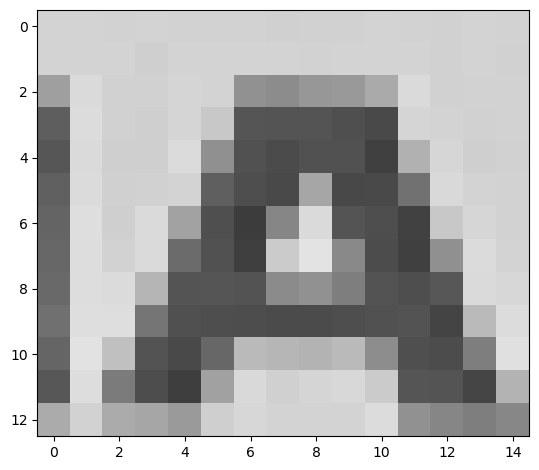

In [9]:
# diplay the charater 'A'
skimgio.imshow(np.array(df.iloc[60,:-2],dtype=np.float32).reshape(imgs_size))

# Train Binary Classification Model and Evaluate Performance

## Assumption for Model:
> In this model, we consider 'Class 4' as 'Class 1' and 'Class A' as 'Class 0'.


In [10]:
# Combine samples labeled as '4' and 'A' for binary classification
train_binary_classification = pd.concat([df[df['label'] == '4'], df[df['label'] == 'A']]).reset_index(drop=True)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train_binary_classification.iloc[:, :-2],
                                                    train_binary_classification.iloc[:, -2],
                                                    test_size=0.3, train_size=0.7, shuffle=True)

# Reset the index for training and testing dataframes
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

# Flatten the target labels
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Create binary labels for '4' (True) and other labels (False) in training and testing sets
y_train_4 = np.array([True if count == '4' else False for count in y_train])
y_test_4 = np.array([True if count == '4' else False for count in y_test])


In [11]:
# Create a Binary Classification Model using Logistic Regression
binary_classification_model = LogisticRegression()

# Train the Binary Classification Model on the training data
binary_classification_model_his = binary_classification_model.fit(x_train, y_train_4)


Precision: 0.8
Recall: 0.26666666666666666
Accuracy: 0.9340659340659341
F1 Score: 0.4


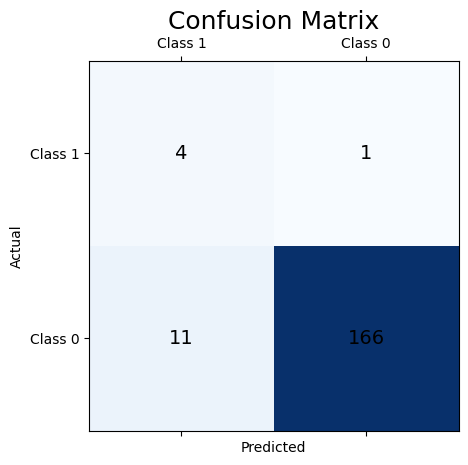

In [12]:
y_pred=binary_classification_model.predict(x_test)
# Initialize the evaluator with actual and predicted labels
evaluator = evaluate_classification_model(y_test_4, y_pred)
# Calculate and print various evaluation metrics
print("Precision:", evaluator.precision())
print("Recall:", evaluator.recall())
print("Accuracy:", evaluator.accuracy())
print("F1 Score:", evaluator.f1_score())
# Display the confusion matrix
evaluator.conf_matrix()